In [1]:
import os
import pandas as pd
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
inv_data = "Metro_invt_fs_uc_sfrcondo_sm_month.csv"
value_data = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
df_inv = pd.read_csv(inv_data)
df_value = pd.read_csv(value_data)
cost_of_copper = "copper-prices-historical-chart-data.csv"
cost_of_lumber = "lumber-prices-historical-chart-data.csv"
df_copper = pd.read_csv(cost_of_copper)
df_lumber = pd.read_csv(cost_of_lumber)
df_lumber = df_lumber.dropna()
df_copper = df_copper.dropna()
df_lumber 


,date,value
0,1972-11-16,128.4
1,1972-11-17,128.4
2,1972-11-20,128.4
3,1972-11-21,127.0
4,1972-11-27,127.1
...,...,...
12704,2023-04-25,365.1
12705,2023-04-26,348.0
12706,2023-04-27,353.8
12707,2023-04-28,347.2


In [3]:


df_lumber['date'] = pd.to_datetime(df_lumber['date'])
df_copper['date'] = pd.to_datetime(df_copper['date'])


In [4]:
df_lumber

,date,value
0,1972-11-16,128.4
1,1972-11-17,128.4
2,1972-11-20,128.4
3,1972-11-21,127.0
4,1972-11-27,127.1
...,...,...
12704,2023-04-25,365.1
12705,2023-04-26,348.0
12706,2023-04-27,353.8
12707,2023-04-28,347.2


In [5]:
df_lumber.info()
df_copper.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12709 entries, 0 to 12708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12709 non-null  datetime64[ns]
 1    value  12709 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 297.9 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15991 entries, 0 to 15990
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    15991 non-null  datetime64[ns]
 1    value  15991 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 374.8 KB


In [6]:
df_lumber_post2000 = df_lumber[df_lumber['date'].dt.year >= 2000]
df_copper_post2000 = df_copper[df_copper['date'].dt.year >= 2000]


In [7]:

df_lumber_post2000

,date,value
6841,2000-01-03,345.5
6842,2000-01-04,352.2
6843,2000-01-05,351.5
6844,2000-01-06,347.2
6845,2000-01-07,348.8
...,...,...
12704,2023-04-25,365.1
12705,2023-04-26,348.0
12706,2023-04-27,353.8
12707,2023-04-28,347.2


<AxesSubplot:title={'center':'Cost of Lumber'}, xlabel='Date', ylabel='Dollars'>

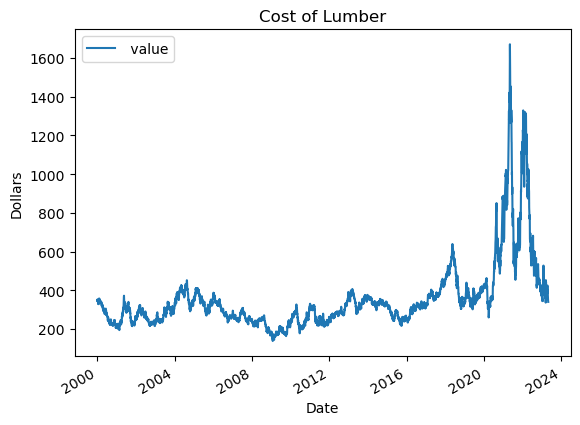

In [8]:


df_lumber_post2000.plot(x='date', y=' value', xlabel='Date', ylabel='Dollars', title='Cost of Lumber', kind='line')




<AxesSubplot:title={'center':'Cost of Copper'}, xlabel='Date', ylabel='Dollars Per Pound'>

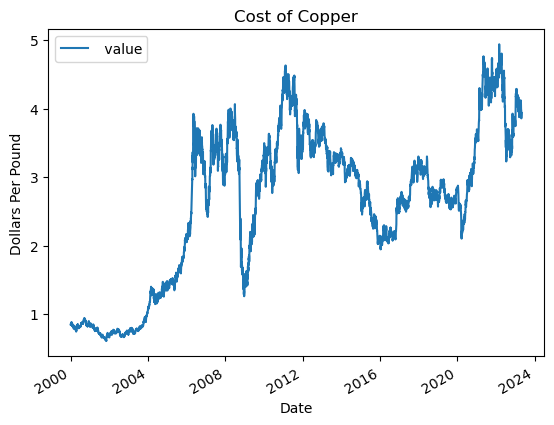

In [9]:
df_copper_post2000.plot(x='date', y=' value', xlabel='Date', ylabel='Dollars Per Pound', title='Cost of Copper', kind='line')




In [10]:
df_inv_mi = df_inv[df_inv['StateName']=='MI']
df_inv_ca = df_inv[df_inv['StateName'] == 'CA']
df_inv_tx = df_inv[df_inv['StateName'] == 'TX']
df_inv_co = df_inv[df_inv['StateName'] == 'CO']
df_inv_fl = df_inv[df_inv['StateName'] == 'FL']
df_inv_ny = df_inv[df_inv['StateName'] == 'NY']


df_inv_mi
df_inv_ca
df_inv_tx
df_inv_co

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
19,394530,19,"Denver, CO",msa,CO,8266.0,9265.0,10460.0,11483.0,12175.0,...,9110.0,10163.0,10861.0,11049.0,10743.0,9938.0,8650.0,7481.0,6773.0,7001.0
79,394484,80,"Colorado Springs, CO",msa,CO,2034.0,2340.0,2865.0,3300.0,3701.0,...,2736.0,3179.0,3532.0,3608.0,3490.0,3209.0,2868.0,2531.0,2264.0,2205.0
151,394602,152,"Fort Collins, CO",msa,CO,1625.0,1779.0,1966.0,2074.0,2126.0,...,1461.0,1628.0,1704.0,1668.0,1605.0,1459.0,1271.0,1086.0,983.0,1001.0
155,394405,156,"Boulder, CO",msa,CO,1022.0,1173.0,1359.0,1497.0,1558.0,...,1123.0,1264.0,1346.0,1330.0,1285.0,1156.0,971.0,788.0,719.0,786.0
160,394645,161,"Greeley, CO",msa,CO,1558.0,1718.0,1796.0,1748.0,1651.0,...,1360.0,1514.0,1630.0,1692.0,1638.0,1500.0,1293.0,1155.0,1069.0,1102.0
260,395007,264,"Pueblo, CO",msa,CO,700.0,700.0,739.0,766.0,802.0,...,689.0,781.0,851.0,893.0,929.0,937.0,929.0,882.0,853.0,847.0
276,394639,280,"Grand Junction, CO",msa,CO,993.0,1035.0,1095.0,1147.0,1190.0,...,723.0,794.0,864.0,906.0,919.0,879.0,820.0,770.0,746.0,743.0
449,753881,456,"Glenwood Springs, CO",msa,CO,901.0,937.0,991.0,1048.0,1105.0,...,410.0,497.0,568.0,595.0,547.0,492.0,438.0,402.0,384.0,375.0
558,394556,566,"Edwards, CO",msa,CO,815.0,839.0,858.0,896.0,953.0,...,409.0,460.0,491.0,476.0,436.0,409.0,399.0,398.0,400.0,398.0
559,394547,567,"Durango, CO",msa,CO,570.0,610.0,693.0,763.0,818.0,...,408.0,464.0,495.0,494.0,472.0,426.0,371.0,323.0,287.0,268.0


In [11]:
df_value_mi = df_value[df_value['StateName']=='MI']
df_value_ca = df_value[df_value['StateName'] == 'CA']
df_value_tx = df_value[df_value['StateName'] == 'TX']
df_value_co = df_value[df_value['StateName'] == 'CO']
df_value_fl = df_value[df_value['StateName'] == 'FL']
df_value_ny = df_value[df_value['StateName'] == 'NY']


In [12]:
df_unpivoted_value_mi = df_value_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_ca = df_value_ca.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_tx = df_value_tx.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_co = df_value_co.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value = df_value.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_fl = df_value_fl.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_ny = df_value_ny.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')

df_unpivoted_value_mi
df_unpivoted_value_ca
df_unpivoted_value_tx
df_unpivoted_value_co
df_unpivoted_value


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
0,102001,0,United States,country,NaN,2000-01-31,112815.884620
1,394913,1,"New York, NY",msa,NY,2000-01-31,179016.866340
2,753899,2,"Los Angeles, CA",msa,CA,2000-01-31,225229.750975
3,394463,3,"Chicago, IL",msa,IL,2000-01-31,140260.935566
4,394514,4,"Dallas, TX",msa,TX,2000-01-31,128720.957496
...,...,...,...,...,...,...,...
249979,753929,935,"Zapata, TX",msa,TX,2023-03-31,93563.045268
249980,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,391507.867579
249981,753874,937,"Craig, CO",msa,CO,2023-03-31,273270.967248
249982,395188,938,"Vernon, TX",msa,TX,2023-03-31,74251.635936


In [13]:
df_unpivoted_value_mi['Date']=pd.to_datetime(df_unpivoted_value_mi['Date'])
df_unpivoted_value_ca['Date']=pd.to_datetime(df_unpivoted_value_ca['Date'])
df_unpivoted_value_tx['Date']=pd.to_datetime(df_unpivoted_value_tx['Date'])
df_unpivoted_value_co['Date']=pd.to_datetime(df_unpivoted_value_co['Date'])
df_unpivoted_value['Date']=pd.to_datetime(df_unpivoted_value['Date'])
df_unpivoted_value_fl['Date']=pd.to_datetime(df_unpivoted_value_fl['Date'])
df_unpivoted_value_ny['Date']=pd.to_datetime(df_unpivoted_value_ny['Date'])

In [14]:
df_unpivoted_value_mi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8649 entries, 0 to 8648
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RegionID             8649 non-null   int64         
 1   SizeRank             8649 non-null   int64         
 2   RegionName           8649 non-null   object        
 3   RegionType           8649 non-null   object        
 4   StateName            8649 non-null   object        
 5   Date                 8649 non-null   datetime64[ns]
 6   Average Home Values  7655 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 473.1+ KB


In [15]:
df_post_covid_value_mi = df_unpivoted_value_mi[df_unpivoted_value_mi['Date'].dt.year>=2019]
df_post_covid_value_ca = df_unpivoted_value_ca[df_unpivoted_value_ca['Date'].dt.year >= 2019]
df_post_covid_value_tx = df_unpivoted_value_tx[df_unpivoted_value_tx['Date'].dt.year >= 2019]
df_post_covid_value_co = df_unpivoted_value_co[df_unpivoted_value_co['Date'].dt.year >= 2019]
df_post_covid_value = df_unpivoted_value[df_unpivoted_value['Date'].dt.year >= 2019]
df_post_covid_value_fl = df_unpivoted_value_fl[df_unpivoted_value_fl['Date'].dt.year >= 2019]
df_post_covid_value_ny = df_unpivoted_value_ny[df_unpivoted_value_ny['Date'].dt.year >= 2019]

df_post_covid_value_mi
df_post_covid_value_ca
df_post_covid_value_tx
df_post_covid_value_co
df_post_covid_value

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
204288,102001,0,United States,country,NaN,2019-01-31,225064.414430
204289,394913,1,"New York, NY",msa,NY,2019-01-31,434781.132507
204290,753899,2,"Los Angeles, CA",msa,CA,2019-01-31,668426.636176
204291,394463,3,"Chicago, IL",msa,IL,2019-01-31,222137.682633
204292,394514,4,"Dallas, TX",msa,TX,2019-01-31,254146.210666
...,...,...,...,...,...,...,...
249979,753929,935,"Zapata, TX",msa,TX,2023-03-31,93563.045268
249980,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,391507.867579
249981,753874,937,"Craig, CO",msa,CO,2023-03-31,273270.967248
249982,395188,938,"Vernon, TX",msa,TX,2023-03-31,74251.635936


In [16]:
df_unpivoted_inv_mi = df_inv_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_ca = df_inv_ca.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_tx = df_inv_tx.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_co = df_inv_co.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv = df_inv.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_fl = df_inv_fl.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_ny = df_inv_ny.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')

df_unpivoted_inv_mi
df_unpivoted_inv_ca
df_unpivoted_inv_tx
df_unpivoted_inv_co
df_unpivoted_inv

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,102001,0,United States,country,NaN,2018-03-31,1421529.0
1,394913,1,"New York, NY",msa,NY,2018-03-31,73707.0
2,753899,2,"Los Angeles, CA",msa,CA,2018-03-31,21998.0
3,394463,3,"Chicago, IL",msa,IL,2018-03-31,38581.0
4,394514,4,"Dallas, TX",msa,TX,2018-03-31,24043.0
...,...,...,...,...,...,...,...
56603,753929,935,"Zapata, TX",msa,TX,2023-03-31,49.0
56604,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,61.0
56605,753874,937,"Craig, CO",msa,CO,2023-03-31,48.0
56606,395188,938,"Vernon, TX",msa,TX,2023-03-31,40.0


In [17]:
df_unpivoted_inv_mi['Date']=pd.to_datetime(df_unpivoted_inv_mi['Date'])
df_unpivoted_inv_ca['Date']=pd.to_datetime(df_unpivoted_inv_ca['Date'])
df_unpivoted_inv_tx['Date']=pd.to_datetime(df_unpivoted_inv_tx['Date'])
df_unpivoted_inv_co['Date']=pd.to_datetime(df_unpivoted_inv_co['Date'])
df_unpivoted_inv['Date']=pd.to_datetime(df_unpivoted_inv['Date'])
df_unpivoted_inv_fl['Date']=pd.to_datetime(df_unpivoted_inv_fl['Date'])
df_unpivoted_inv_ny['Date']=pd.to_datetime(df_unpivoted_inv_ny['Date'])

In [18]:
df_post_covid_inv_mi = df_unpivoted_inv_mi[df_unpivoted_inv_mi['Date'].dt.year>=2019]
df_post_covid_inv_ca = df_unpivoted_inv_ca[df_unpivoted_inv_ca['Date'].dt.year >= 2019]
df_post_covid_inv_tx = df_unpivoted_inv_tx[df_unpivoted_inv_tx['Date'].dt.year >= 2019]
df_post_covid_inv_co = df_unpivoted_inv_co[df_unpivoted_inv_co['Date'].dt.year >= 2019]
df_post_covid_inv = df_unpivoted_inv[df_unpivoted_inv['Date'].dt.year >= 2019]
df_post_covid_inv_fl = df_unpivoted_inv_fl[df_unpivoted_inv_fl['Date'].dt.year >= 2019]
df_post_covid_inv_ny = df_unpivoted_inv_ny[df_unpivoted_inv_ny['Date'].dt.year >= 2019]

df_post_covid_inv_mi
df_post_covid_inv_ca
df_post_covid_inv



,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
9280,102001,0,United States,country,NaN,2019-01-31,1452603.0
9281,394913,1,"New York, NY",msa,NY,2019-01-31,76678.0
9282,753899,2,"Los Angeles, CA",msa,CA,2019-01-31,26635.0
9283,394463,3,"Chicago, IL",msa,IL,2019-01-31,38250.0
9284,394514,4,"Dallas, TX",msa,TX,2019-01-31,27727.0
...,...,...,...,...,...,...,...
56603,753929,935,"Zapata, TX",msa,TX,2023-03-31,49.0
56604,394743,936,"Ketchikan, AK",msa,AK,2023-03-31,61.0
56605,753874,937,"Craig, CO",msa,CO,2023-03-31,48.0
56606,395188,938,"Vernon, TX",msa,TX,2023-03-31,40.0


In [19]:
cities_list=["Detroit, MI", "Denver, CO", "Dallas, TX", "Los Angeles, CA", "Seattle, WA", "Tampa, FL", "New York, NY"]
df_post_covid_inv_combined = df_post_covid_inv[df_post_covid_inv['RegionName'].isin(cities_list)]
df_post_covid_inv_combined


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
9281,394913,1,"New York, NY",msa,NY,2019-01-31,76678.0
9282,753899,2,"Los Angeles, CA",msa,CA,2019-01-31,26635.0
9284,394514,4,"Dallas, TX",msa,TX,2019-01-31,27727.0
9294,394532,14,"Detroit, MI",msa,MI,2019-01-31,16986.0
9295,395078,15,"Seattle, WA",msa,WA,2019-01-31,9544.0
...,...,...,...,...,...,...,...
55684,394514,4,"Dallas, TX",msa,TX,2023-03-31,17038.0
55694,394532,14,"Detroit, MI",msa,MI,2023-03-31,10486.0
55695,395078,15,"Seattle, WA",msa,WA,2023-03-31,5714.0
55698,395148,18,"Tampa, FL",msa,FL,2023-03-31,13533.0


Text(0.5, 1.0, 'Home Inventory')

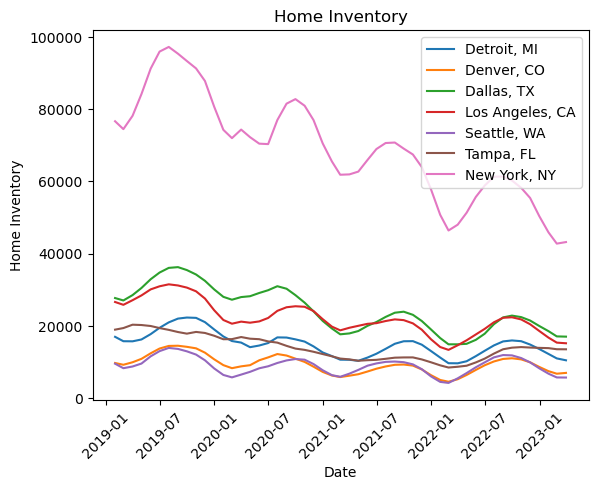

In [20]:
fig, ax = plt.subplots()
for x in cities_list:
    final_data_inv = df_post_covid_inv[df_post_covid_inv['RegionName'] == x]
    ax.plot(final_data_inv['Date'], final_data_inv['Total Inventory'])
plt.legend(cities_list)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Home Inventory')
plt.title('Home Inventory')



Text(0.5, 1.0, 'Change in Home Value')

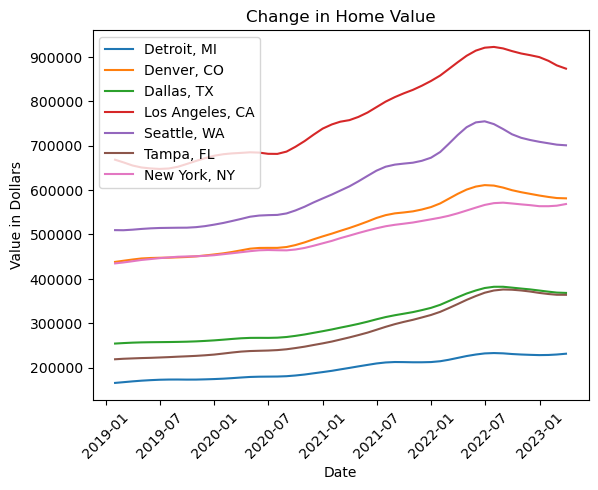

In [21]:
fig,ax=plt.subplots()
for x in cities_list:

    # Locate the rows which Average home values depent on the states
    final_data = df_post_covid_value[df_post_covid_value['RegionName']== x]
    ax.plot(final_data['Date'], final_data['Average Home Values'])
plt.legend(cities_list)
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Value in Dollars')
plt.title('Change in Home Value')

In [22]:
df_post_covid_inv_detroit = df_post_covid_inv_mi[df_post_covid_inv_mi['RegionName']=="Detroit, MI"]
df_post_covid_inv_la = df_post_covid_inv_ca[df_post_covid_inv_ca['RegionName'] == "Los Angeles, CA"]
df_post_covid_inv_dallas = df_post_covid_inv_tx[df_post_covid_inv_tx['RegionName'] == "Dallas, TX"]
df_post_covid_inv_denver = df_post_covid_inv_co[df_post_covid_inv_co['RegionName'] == "Denver, CO"]
df_post_covid_inv_tampa = df_post_covid_inv_fl[df_post_covid_inv_fl['RegionName'] == "Tampa, FL"]
df_post_covid_inv_newyork = df_post_covid_inv_ny[df_post_covid_inv_ny['RegionName'] == "New York, NY"]


df_post_covid_inv_detroit
df_post_covid_inv_la
df_post_covid_inv_dallas
df_post_covid_inv_denver

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
170,394530,19,"Denver, CO",msa,CO,2019-01-31,9739.0
187,394530,19,"Denver, CO",msa,CO,2019-02-28,9249.0
204,394530,19,"Denver, CO",msa,CO,2019-03-31,9945.0
221,394530,19,"Denver, CO",msa,CO,2019-04-30,10894.0
238,394530,19,"Denver, CO",msa,CO,2019-05-31,12422.0
255,394530,19,"Denver, CO",msa,CO,2019-06-30,13742.0
272,394530,19,"Denver, CO",msa,CO,2019-07-31,14466.0
289,394530,19,"Denver, CO",msa,CO,2019-08-31,14518.0
306,394530,19,"Denver, CO",msa,CO,2019-09-30,14218.0
323,394530,19,"Denver, CO",msa,CO,2019-10-31,13802.0


<AxesSubplot:title={'center':'Home Inventory New York'}, xlabel='Date', ylabel='Home Inventory'>

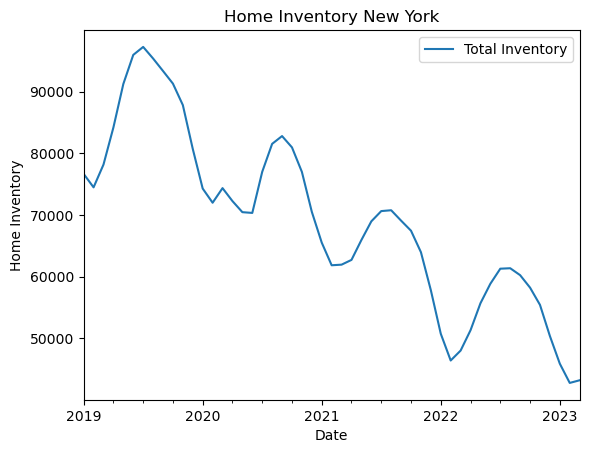

In [23]:
df_post_covid_inv_newyork.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory New York', kind='line')


<AxesSubplot:title={'center':'Home Inventory Tampa'}, xlabel='Date', ylabel='Home Inventory'>

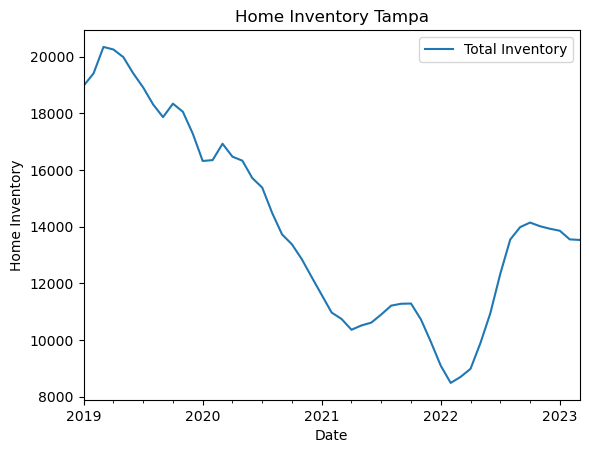

In [24]:
df_post_covid_inv_tampa.plot(x='Date', y='Total Inventory', xlabel='Date', ylabel='Home Inventory', title='Home Inventory Tampa', kind='line')


<AxesSubplot:title={'center':'Home Inventory Detroit'}, xlabel='Date', ylabel='Home Inventory'>

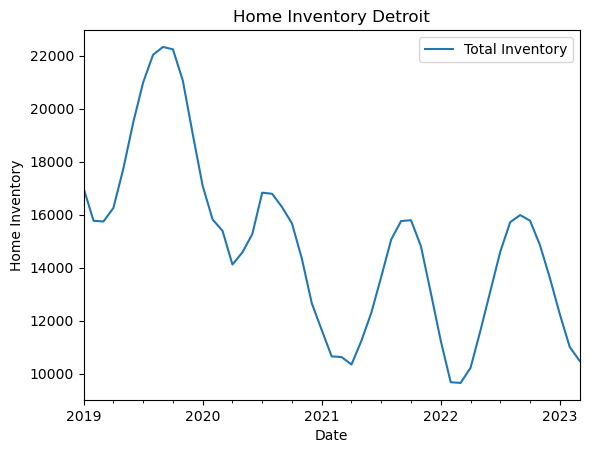

In [25]:
df_post_covid_inv_detroit.plot(x='Date', y='Total Inventory',xlabel='Date', ylabel='Home Inventory', title='Home Inventory Detroit', kind='line')

<AxesSubplot:title={'center':'Home Inventory Los Angeles'}, xlabel='Date', ylabel='Home Inventory'>

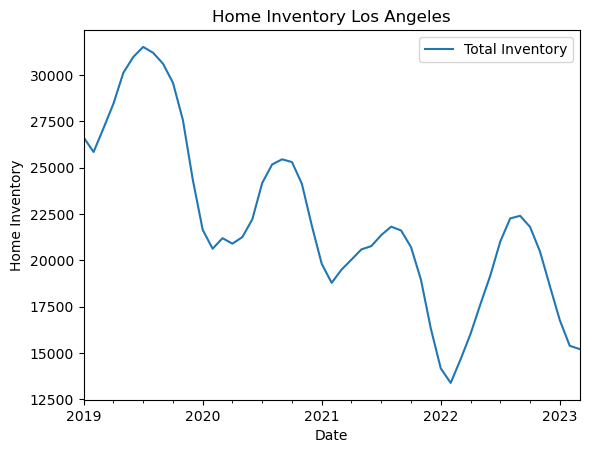

In [26]:
df_post_covid_inv_la.plot(x='Date', y='Total Inventory', xlabel='Date',
                          ylabel='Home Inventory', title='Home Inventory Los Angeles', kind='line')


<AxesSubplot:title={'center':'Home Inventory Dallas'}, xlabel='Date', ylabel='Home Inventory'>

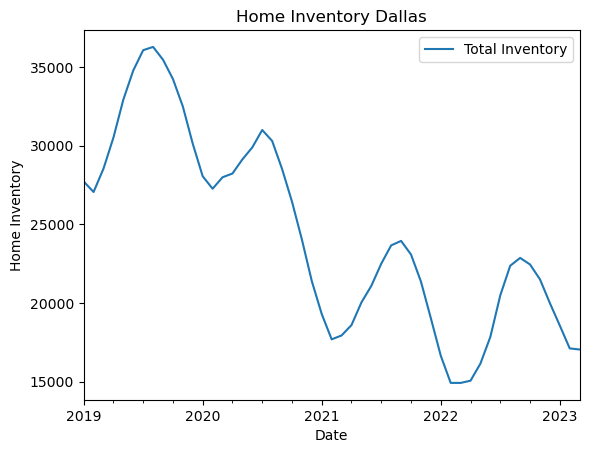

In [27]:
df_post_covid_inv_dallas.plot(x='Date', y='Total Inventory', xlabel='Date',
                              ylabel='Home Inventory', title='Home Inventory Dallas', kind='line')


<AxesSubplot:title={'center':'Home Inventory Denver'}, xlabel='Date', ylabel='Home Inventory'>

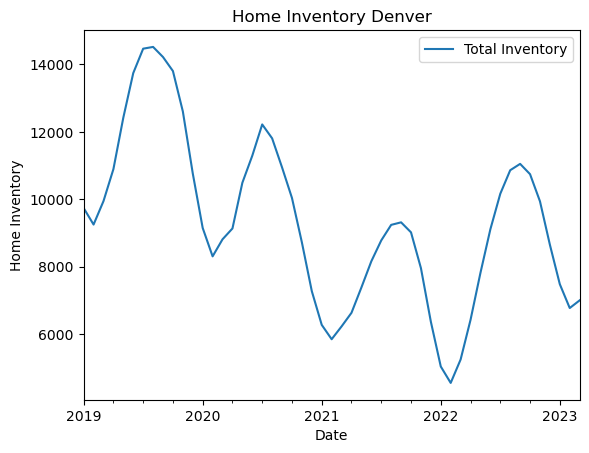

In [28]:
df_post_covid_inv_denver.plot(x='Date', y='Total Inventory', xlabel='Date',
                              ylabel='Home Inventory', title='Home Inventory Denver', kind='line')


In [29]:
df_post_covid_value_detroit = df_post_covid_value_mi[df_post_covid_value_mi['RegionName'] == "Detroit, MI"]
df_post_covid_value_la = df_post_covid_value_ca[df_post_covid_value_ca['RegionName']== "Los Angeles, CA"]
df_post_covid_value_dallas = df_post_covid_value_tx[df_post_covid_value_tx['RegionName'] == "Dallas, TX"]
df_post_covid_value_denver = df_post_covid_value_co[df_post_covid_value_co['RegionName'] == "Denver, CO"]
df_post_covid_value_tampa = df_post_covid_value_fl[df_post_covid_value_fl['RegionName'] == "Tampa, FL"]
df_post_covid_value_newyork = df_post_covid_value_ny[df_post_covid_value_ny['RegionName'] == "New York, NY"]


df_post_covid_value_detroit
df_post_covid_value_la
df_post_covid_value_dallas
df_post_covid_value_denver


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
3876,394530,19,"Denver, CO",msa,CO,2019-01-31,438137.861906
3893,394530,19,"Denver, CO",msa,CO,2019-02-28,440706.229763
3910,394530,19,"Denver, CO",msa,CO,2019-03-31,443521.586199
3927,394530,19,"Denver, CO",msa,CO,2019-04-30,445897.963798
3944,394530,19,"Denver, CO",msa,CO,2019-05-31,446944.921690
3961,394530,19,"Denver, CO",msa,CO,2019-06-30,447469.385551
3978,394530,19,"Denver, CO",msa,CO,2019-07-31,447707.209303
3995,394530,19,"Denver, CO",msa,CO,2019-08-31,448428.016380
4012,394530,19,"Denver, CO",msa,CO,2019-09-30,449220.317428
4029,394530,19,"Denver, CO",msa,CO,2019-10-31,450639.061205


<AxesSubplot:title={'center':'Home Values New York City'}, xlabel='Date', ylabel='Home Values'>

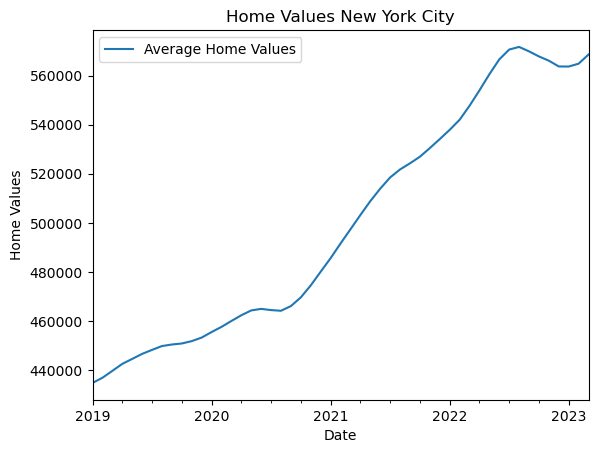

In [30]:
df_post_covid_value_newyork.plot(
    x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values New York City', kind='line')


<AxesSubplot:title={'center':'Home Values Tampa'}, xlabel='Date', ylabel='Home Values'>

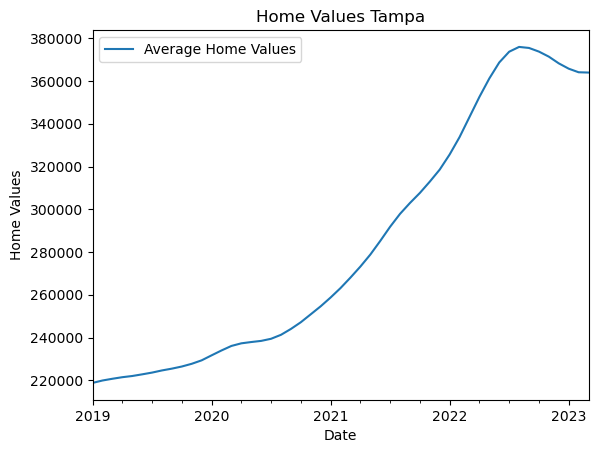

In [31]:
df_post_covid_value_tampa.plot(
    x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Tampa', kind='line')


<AxesSubplot:title={'center':'Home Values Detroit'}, xlabel='Date', ylabel='Home Values'>

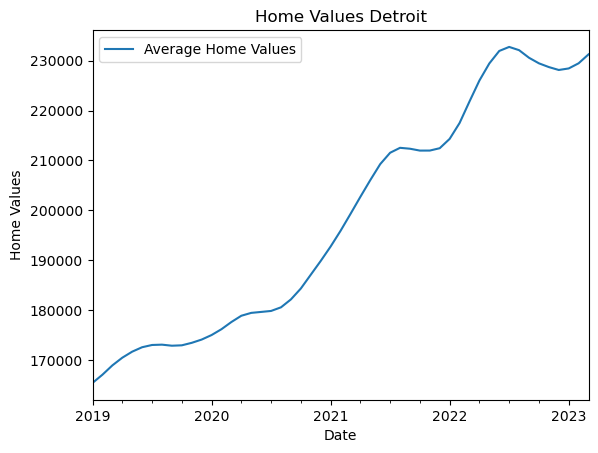

In [32]:
df_post_covid_value_detroit.plot(x='Date', y='Average Home Values', xlabel='Date',
                                 ylabel='Home Values', title='Home Values Detroit', kind='line')


<AxesSubplot:title={'center':'Home Values Los Angeles'}, xlabel='Date', ylabel='Home Values'>

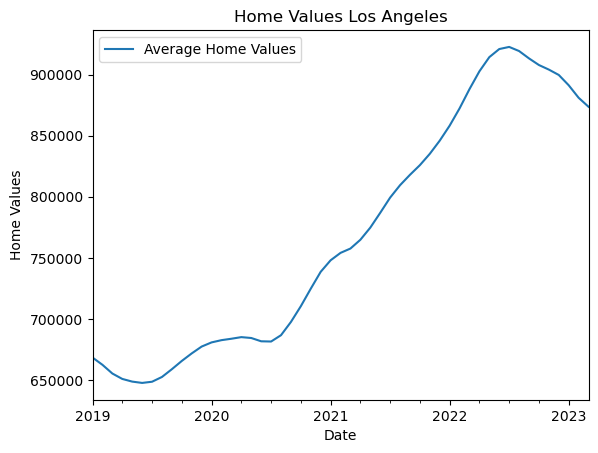

In [33]:
df_post_covid_value_la.plot(x='Date', y='Average Home Values', xlabel='Date',
                            ylabel='Home Values', title='Home Values Los Angeles', kind='line')


<AxesSubplot:title={'center':'Home Values Dallas'}, xlabel='Date', ylabel='Home Values'>

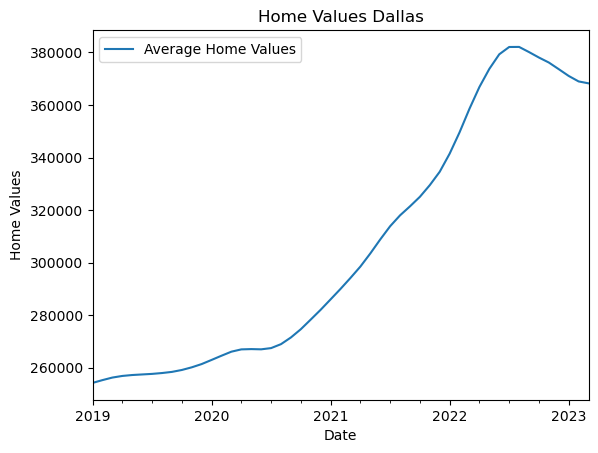

In [34]:
df_post_covid_value_dallas.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Dallas',kind='line')

<AxesSubplot:title={'center':'Home Values Denver'}, xlabel='Date', ylabel='Home Values'>

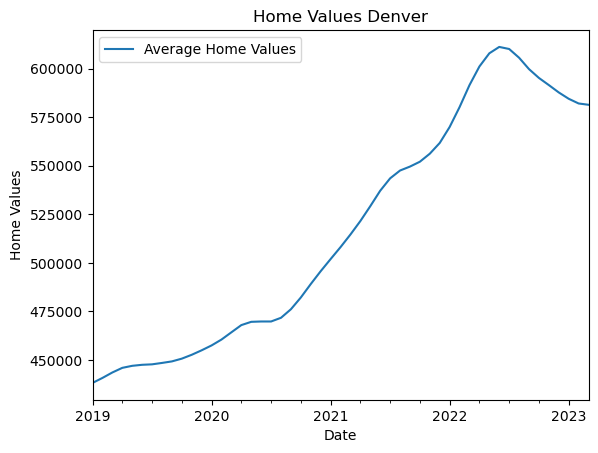

In [35]:
df_post_covid_value_denver.plot(x='Date', y='Average Home Values', xlabel='Date', ylabel='Home Values', title='Home Values Denver',kind='line')

In [36]:
df_post_covid_value_detroit = df_post_covid_value_mi[df_post_covid_value_mi['RegionName'] == "Detroit, MI"]
df_post_covid_value_la = df_post_covid_value_ca[df_post_covid_value_ca['RegionName']== "Los Angeles, CA"]
df_post_covid_value_dallas = df_post_covid_value_tx[df_post_covid_value_tx['RegionName'] == "Dallas, TX"]
df_post_covid_value_denver = df_post_covid_value_co[df_post_covid_value_co['RegionName'] == "Denver, CO"]
df_post_covid_value_tampa = df_post_covid_value_fl[df_post_covid_value_fl['RegionName'] == "Tampa, FL"]
df_post_covid_value_newyork = df_post_covid_value_ny[df_post_covid_value_ny['RegionName'] == "New York, NY"]


In [37]:
detroit_mean = df_post_covid_value_detroit["Average Home Values"].mean()
detroit_mean

198381.92708998272

In [38]:
losangel_mean = df_post_covid_value_la["Average Home Values"].mean()
losangel_mean

769309.9121738225

In [39]:
dallas_mean = df_post_covid_value_dallas["Average Home Values"].mean()
dallas_mean

305909.1687688981

In [40]:
denver_mean = df_post_covid_value_denver["Average Home Values"].mean()
denver_mean

516913.5813604

In [41]:
tampa_mean = df_post_covid_value_tampa["Average Home Values"].mean()
tampa_mean

283358.8042063537

In [42]:
newyork_mean = df_post_covid_value_newyork["Average Home Values"].mean()
newyork_mean 

500083.7954542619

In [48]:
def gendata(loc=0):
    detroit_mean = stats.norm.rvs(size=1000)
    losangel_mean = stats.norm.rvs(size=1000)
    plt.subplot(2, 1, 1)
    plt.scatter(range(len( detroit_mean)), detroit_mean, label = "Average Home Values in Detroit")
    plt.scatter(range(len( losangel_mean)),losangel_mean, label = "Average Home Values in Los Angeles")
    plt.legend()
    
    plt.subplot(2, 1, 2)
    plt.hist(detroit_mean, 20, density=True, alpha=0.7, label ="Average Home Values in Detroit")
    plt.hist(losangel_mean,density=True, alpha=0.7, label ="Average Home Values in Los Angeles" )
    plt.axvline(detroit_mean.mean(), color="k", linestyle="dashed", linewidth=1)
    plt.axvline(losangel_mean.mean(), color="k", linestyle="dashed", linewidth=1)
    plt.legend()
    return detroit_mean, losangel_mean
        

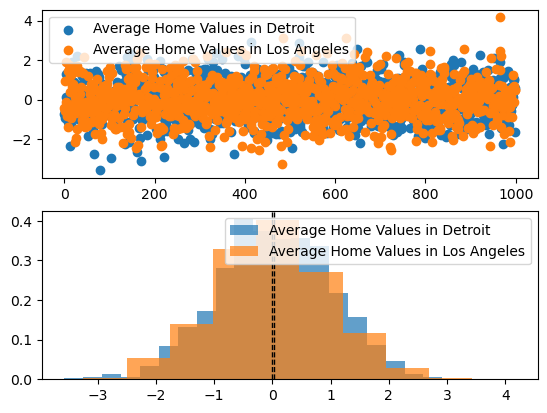

In [49]:
detroit_mean, losangel_mean = gendata()

In [47]:
stats.ttest_1samp(detroit_mean, losangel_mean.mean())

Ttest_1sampResult(statistic=1.0003277028403128, pvalue=0.3173941765018143)

# Analysis Report

## . Average Home Values : 
    Our project focus towards the changes in the home values in USA. we selected six different cities for the conclusion.    "Detroit, MI", "Denver, CO", "Dallas, TX", "Los Angeles, CA", "Seattle, WA", "Tampa, FL", "New York, NY". Increase the price of lumber and copper for the construction materials, that effects the home values in different states. Home values surged COVID time frame, increase the cost of materials, effect the home values increases.Comparatively, highest homevalue shows in Florida, almost 42% higher in the present time from the flow of pandamic time.In Detroit, 2021, 2022, 2023 almost same home value.
    
## . Total Inventory:
      
    Total Inventory is decreasing from 2019(COVID time) to the present.The graph shows people don't really buy homes in the present situation because of home value increases the pandamic time. still affect the home values. Comaparatively, newYork city shows the deep changes in the inventory, almost 55% low people buy home. 
    
## . ttest
     
     Compare the mean average home values in Detroit ang Los Angeles. the P value is 0.31739. that means P value is greater than 0.05, failed to reject the null hypothesis, that means some factors affect the increase of average home values in Los Angeles than the Detroit. Factors like lumber price and copper price. 

